In [3]:
import numpy as np  
from scipy import misc  
from PIL import Image  
import glob  
import matplotlib.pyplot as plt  
import scipy.misc  
from matplotlib.pyplot import imshow  
%matplotlib inline
from IPython.display import SVG  
import cv2  
import seaborn as sn  
import pandas as pd  
import pickle  
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
from keras.utils import plot_model  
from keras.initializers import glorot_uniform  
from keras import losses  
import keras.backend as K  
from keras.callbacks import ModelCheckpoint  
from sklearn.metrics import confusion_matrix, classification_report  
import tensorflow as tf  
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 16s 0us/step


In [4]:
y_train = np_utils.to_categorical(y_train_original, 100)  
y_test = np_utils.to_categorical(y_test_original, 100)  

In [5]:
x_train_original[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

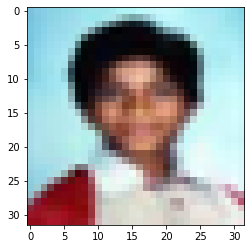

In [6]:
imgplot = plt.imshow(x_train_original[3])  
plt.show()

In [7]:
x_train = x_train_original/255  
x_test = x_test_original/255  

In [8]:
K.set_image_data_format('channels_last')  
K.set_learning_phase(1)  

In [9]:
def create_simple_cnn():  
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))

  model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='softmax'))

  return model

In [10]:
scnn_model = create_simple_cnn()  
scnn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])  

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
scnn_model.summary()  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 512)         1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 512)        

In [12]:
scnn = scnn_model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True)  

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 939s 19ms/step - loss: 4.6010 - acc: 0.0132 - mse: 0.0099 - val_loss: 4.5861 - val_acc: 0.0208 - val_mse: 0.0099
Epoch 2/10
50000/50000 [==============================] - 925s 18ms/step - loss: 4.4533 - acc: 0.0269 - mse: 0.0099 - val_loss: 4.3588 - val_acc: 0.0320 - val_mse: 0.0098
Epoch 3/10
50000/50000 [==============================] - 969s 19ms/step - loss: 4.2341 - acc: 0.0545 - mse: 0.0098 - val_loss: 4.1504 - val_acc: 0.0679 - val_mse: 0.0098
Epoch 4/10
50000/50000 [==============================] - 929s 19ms/step - loss: 4.0116 - acc: 0.0887 - mse: 0.0097 - val_loss: 3.9412 - val_acc: 0.0979 - val_mse: 0.0096
Epoch 5/10
50000/50000 [==============================] - 917s 18ms/step - loss: 3.8397 - acc: 0.1161 - mse: 0.0095 - val_loss: 3.8316 - val_acc: 0.1184 - val_mse: 0.0095
Epoch 6/10
50000/50000 [=======================

In [13]:
cnn_evaluation = scnn_model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)  
cnn_evaluation

10000/10000 [==============================] - 23s 2ms/step


[3.299634595870972, 0.21389999985694885, 0.008952372707426548]

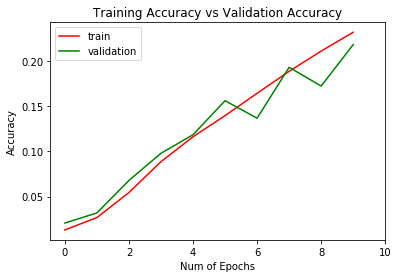

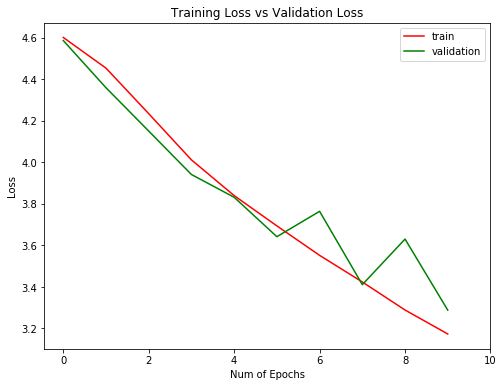

In [14]:
plt.figure(0)  
plt.plot(scnn.history['acc'],'r')  
plt.plot(scnn.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(scnn.history['loss'],'r')  
plt.plot(scnn.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  

In [15]:
scnn_pred = scnn_model.predict(x_test, batch_size=32, verbose=1)  
scnn_predicted = np.argmax(scnn_pred, axis=1)  

10000/10000 [==============================] - 22s 2ms/step


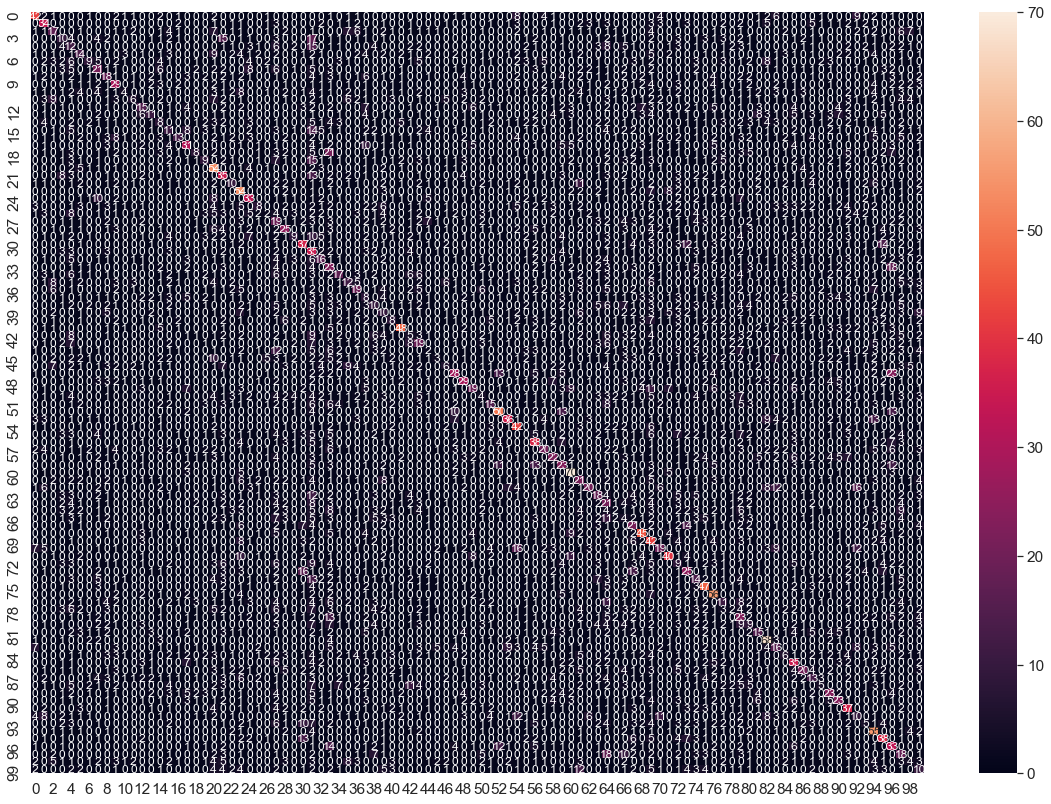

In [16]:
#Creamos la matriz de confusión
scnn_cm = confusion_matrix(np.argmax(y_test, axis=1), scnn_predicted)

# Visualiamos la matriz de confusión
scnn_df_cm = pd.DataFrame(scnn_cm, range(100), range(100))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(scnn_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [17]:
scnn_report = classification_report(np.argmax(y_test, axis=1), scnn_predicted)  
print(scnn_report) 

              precision    recall  f1-score   support

           0       0.50      0.42      0.46       100
           1       0.32      0.34      0.33       100
           2       0.23      0.17      0.20       100
           3       0.13      0.10      0.11       100
           4       0.07      0.12      0.09       100
           5       0.18      0.14      0.16       100
           6       0.24      0.09      0.13       100
           7       0.20      0.21      0.20       100
           8       0.18      0.18      0.18       100
           9       0.28      0.29      0.29       100
          10       0.21      0.04      0.07       100
          11       0.25      0.06      0.10       100
          12       0.22      0.15      0.18       100
          13       0.29      0.11      0.16       100
          14       0.11      0.08      0.09       100
          15       0.13      0.11      0.12       100
          16       0.33      0.13      0.19       100
          17       0.30    

C:\Users\otaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


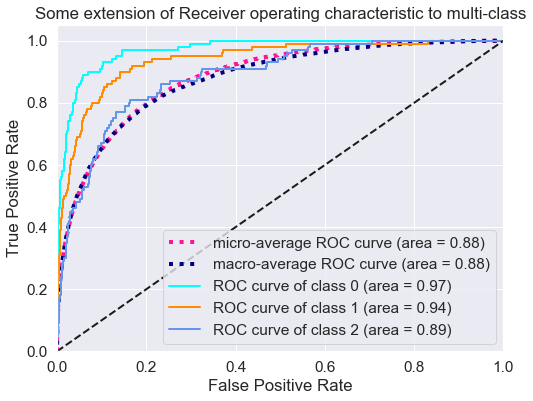

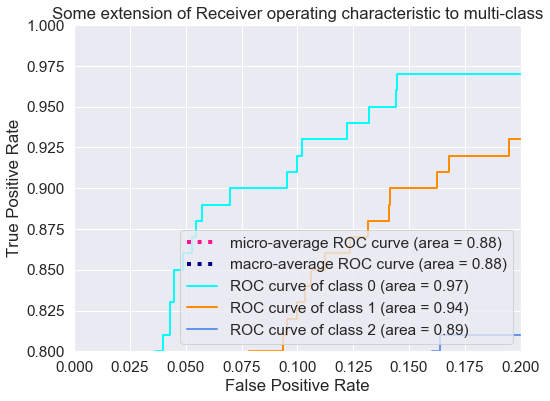

In [18]:
from sklearn.datasets import make_classification  
from sklearn.preprocessing import label_binarize  
from scipy import interp  
from itertools import cycle

n_classes = 100

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], scnn_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), scnn_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes-97), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(3), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()  

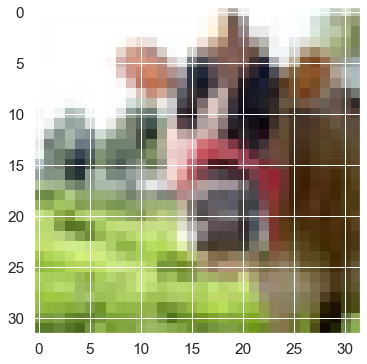

class for image 1: 49
predicted:         8


In [19]:
imgplot = plt.imshow(x_train_original[0])  
plt.show()  
print('class for image 1: ' + str(np.argmax(y_test[0])))  
print('predicted:         ' + str(scnn_predicted[0]))  

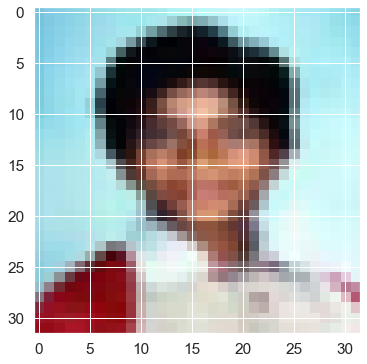

class for image 3: 51
predicted:         23


In [21]:
imgplot = plt.imshow(x_train_original[3])  
plt.show()  
print('class for image 3: ' + str(np.argmax(y_test[3])))  
print('predicted:         ' + str(scnn_predicted[3]))  

In [32]:
with open('./history' + '/modelocifar100_history.txt', 'wb') as file_pi:  
  pickle.dump(scnn.history, file_pi)

In [ ]:
ef create_vgg19():  
  model = vgg19.VGG19(include_top=True, weights=None, input_tensor=None, input_shape=(48,48,3), pooling=None, classes=100)

  return model

vgg19_model = create_vgg19()  
vgg19_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])  